In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier()
iris_tree.fit(iris.data[:, 2:], iris.target)

DecisionTreeClassifier()

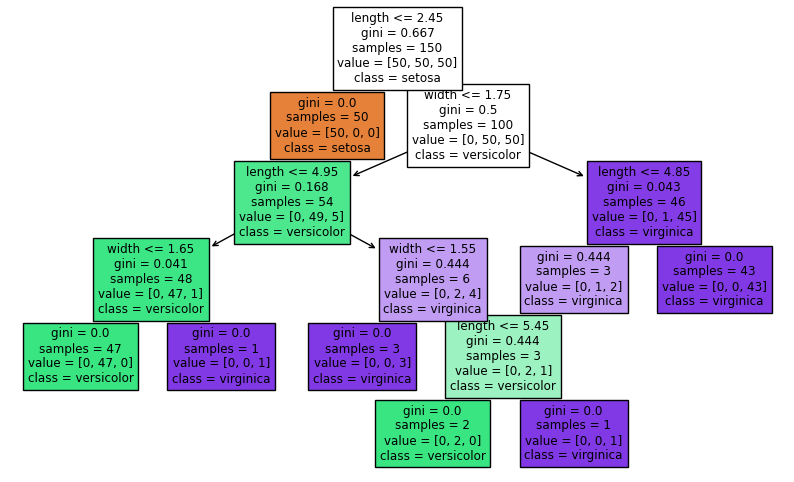

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize = (10, 6))
_ = tree.plot_tree(iris_tree, feature_names = ['length', 'width'], class_names = list(iris.target_names), filled = True)

In [ ]:
# !pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.4 MB 5.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 6.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 6.6 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 6.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 6.4 MB/s eta 0:00:02
    --------------------------------------- 0.2/9.3 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.3 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.3 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.3 MB 2.1 MB/s eta 0:00:05
   --- -------------------

<Axes: >

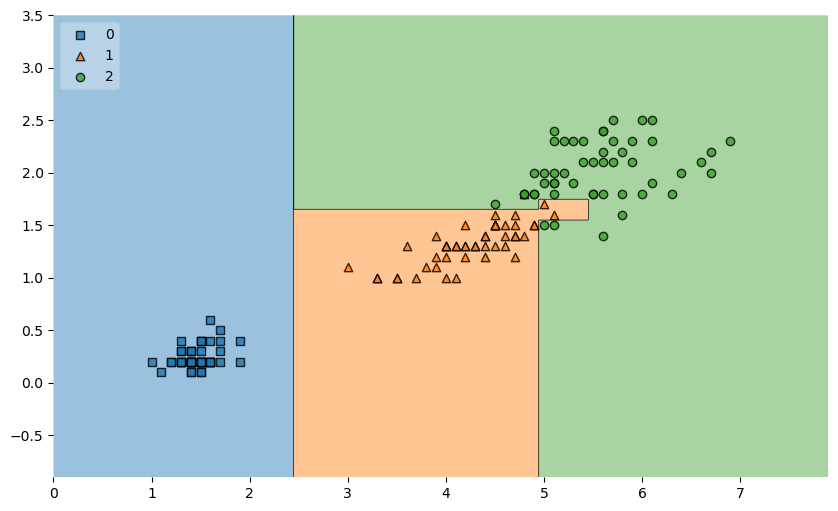

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 6))
plot_decision_regions(X = iris.data[:, 2:], y = iris.target, clf = iris_tree, legend = 2)

In [12]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify = labels, random_state = 13)

In [13]:
import numpy as np

np.unique(y_test, return_counts = True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [14]:
iris_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [15]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
y_pred_tr

array([1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0,
       1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 2])

In [17]:
accuracy_score(y_train, y_pred_tr)

0.95

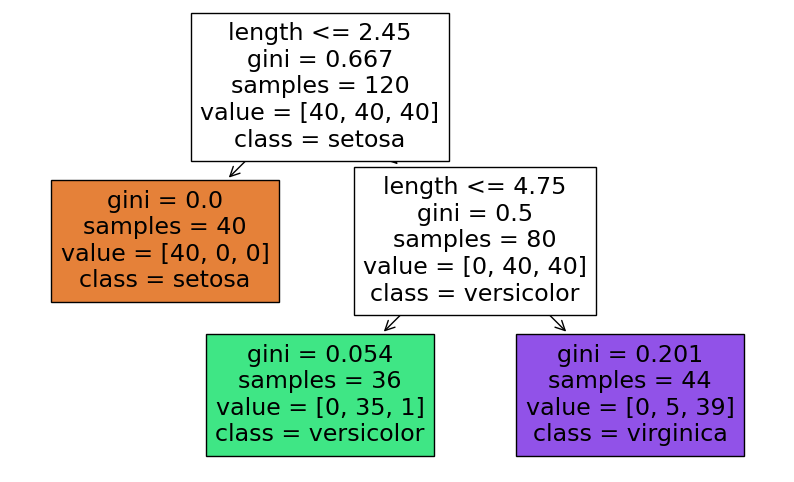

In [19]:
fig = plt.figure(figsize = (10, 6))
_ = tree.plot_tree(iris_tree, feature_names = ['length', 'width'], class_names = list(iris.target_names), filled = True)

<Axes: >

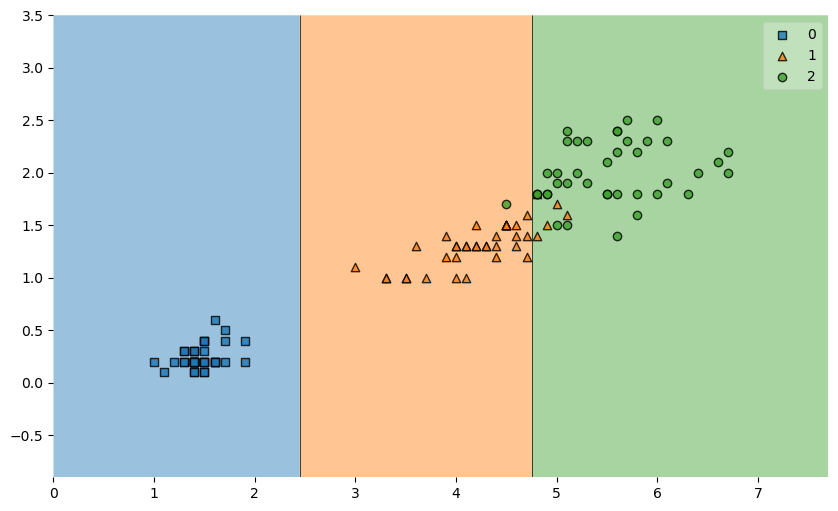

In [20]:
plt.figure(figsize = (10, 6))
plot_decision_regions(X = X_train, y = y_train, clf = iris_tree)

In [22]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

<Axes: >

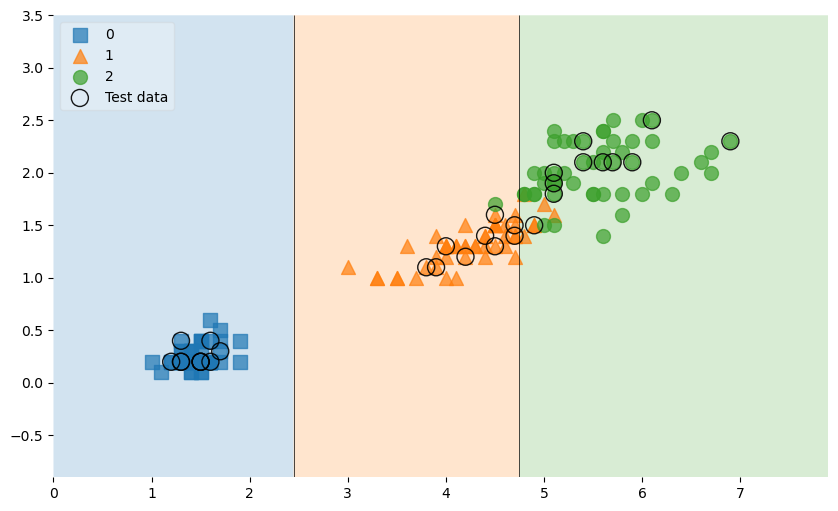

In [23]:
scatter_highlight_kwargs = {'s' : 150, 'label' : 'Test data', 'alpha' : 0.9}
scatter_kwargs = {'s' : 100, 'edgecolor' : None, 'alpha' : 0.7}

plt.figure(figsize = (10, 6))
plot_decision_regions(X = features, y = labels, X_highlight = X_test, clf = iris_tree, legend = 2, scatter_highlight_kwargs = scatter_highlight_kwargs, scatter_kwargs = scatter_kwargs, contourf_kwargs = {'alpha' : 0.2})

In [24]:
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify = labels, random_state = 13)

In [34]:
iris_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

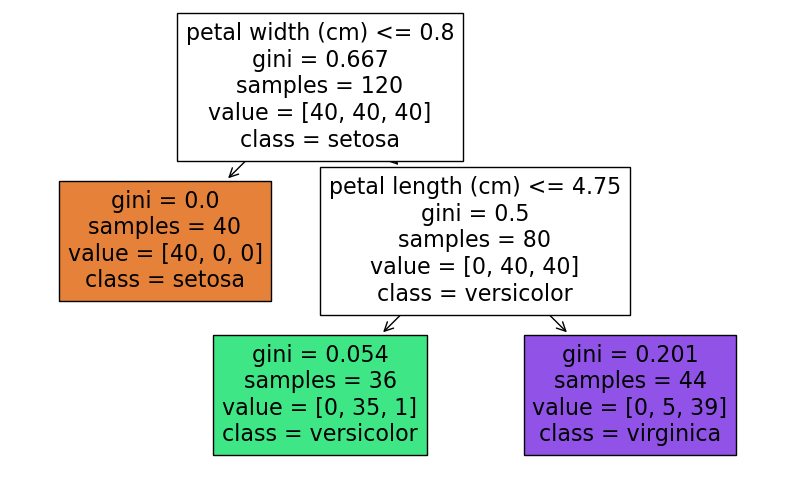

In [35]:
fig = plt.figure(figsize = (10, 6))
_ = tree.plot_tree(iris_tree, feature_names = list(iris.feature_names), class_names = list(iris.target_names), filled = True)

In [36]:
test_data = [[4.3, 2., 1.2, 1.0]]
iris_tree.predict(test_data)

array([1])

In [37]:
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [39]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [40]:
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [41]:
dict(zip(iris.feature_names, iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}